#Theoretical Questions

**Question 1**

What is unsupervised learning in the context of machine learning?

**Answer 1**

Unsupervised learning is a type of machine learning where the algorithm is trained on data without labeled outputs and tries to discover hidden patterns or structure, such as clusters or groups, in the data.


**Question 2**

How does K-Means clustering algorithm work?

**Answer 2**

K-Means clustering algorithm works by the below mentioned methods:

- Choose the number of clusters 'k' and randomly initialize k centroids.

- Assign each point to the nearest centroid, then recompute centroids as the mean of assigned points, and repeat until assignments stop changing or a stopping criterion is met.


**Question 3**

Explain the concept of a dendrogram in hierarchical clustering.

**Answer 3**

A dendrogram is a tree-like diagram that shows how data points are merged or split at successive distance thresholds in hierarchical clustering. It visualizes the nested grouping of points and allows choosing the number of clusters by “cutting” the tree at a chosen height.


**Question 4**

What is the main difference between K-Means and Hierarchical Clustering?

**Answer 4**

The main difference is:

K-Means is a partitional method that directly partitions data into
k clusters and usually requires specifying k in advance.

Hierarchical clustering builds a hierarchy of clusters (bottom-up agglomerative or top-down divisive) and does not require fixing k beforehand, clusters are obtained by cutting the dendrogram.


**Question 5**

What are the advantages of DBSCAN over K-Means?

**Answer 5**

Advantages of DBSCAN over K-means are:

Can find arbitrarily shaped clusters (not just spherical) and automatically discovers the number of clusters.

Handles noise/outliers explicitly and is less sensitive to outliers than K-Means.


**Question 6**

When would you use Silhouette Score in clustering?

**Answer 6**

Silhouette Score is used to evaluate clustering quality by measuring how similar a point is to its own cluster compared to other clusters, typically to compare different values of k or different clustering algorithms.

Higher average silhouette indicates better defined and more separated clusters.


**Question 7**

What are the limitations of Hierarchical Clustering?

**Answer 7**

The limitations are:

- Computationally expensive in time and memory for large datasets, since distance computations grow quickly with data size.

- Once a merge or split decision is made it cannot be undone, so errors early in the process can propagate.


**Question 8**

Why is feature scaling important in clustering algorithms like K-Means?

**Answer 8**

K-Means and many clustering algorithms rely on distance measures like Euclidean distance, so features with larger scales dominate the distance calculation.
Scaling (e.g., standardization or min-max scaling) ensures all features contribute more fairly to cluster formation.


**Question 9**

How does DBSCAN identify noise points?

**Answer 9**

DBSCAN classifies points as core, border, or noise based on two parameters: neighborhood radius and minimum points.

Points that are not within the dense neighborhood of any core point and cannot be reached from a core point are labeled as noise (outliers).


**Question 10**

Define inertia in the context of K-Means.

**Answer 10**

Inertia is the sum of squared distances of each data point to its assigned cluster centroid, representing how compact the clusters are.
Lower inertia generally indicates tighter, more cohesive clusters.


**Question 11**

What is the elbow method in K-Means clustering?

**Answer 11**

The elbow method plots inertia versus the number of clusters k and looks for a “bend” or elbow point where the rate of decrease in inertia sharply changes.
This elbow is taken as a reasonable choice for k, balancing compactness and model simplicity.


**Question 12**

Describe the concept of "density" in DBSCAN.

**Answer 12**

In DBSCAN, density is defined by how many points fall within a given radius (eps) of a point.
A region is considered dense if there are at least min_samples points within this radius, forming the basis for core points and clusters.


**Question 13**

Can hierarchical clustering be used on categorical data?

**Answer 13**

Yes, hierarchical clustering can be used on categorical data if an appropriate distance or similarity measure for categorical variables is defined.

However, standard implementations based on Euclidean distance are more natural for numerical data, so categorical clustering may need specialized distance metrics or preprocessing.


**Question 14**

What does a negative Silhouette Score indicate?

**Answer 14**

A negative silhouette value for a sample indicates it is, on average, closer to points in another cluster than to points in its own cluster.

This suggests that the sample may be misclustered or that the clustering structure is poor.


**Question 15**

Explain the term "linkage criteria" in hierarchical clustering.

**Answer 15**

Linkage criteria specify how the distance between two clusters is computed when merging them, based on the pairwise distances between their points.

Common linkage types include single (min distance), complete (max distance), average (mean distance), and Ward's method (increase in variance).


**Question 16**

Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

**Answer 16**

K-Means assumes clusters are roughly spherical, of similar size, and similar density, and uses mean as a prototype and Euclidean distance.

When cluster sizes or densities vary, points from small or sparse clusters may be pulled into larger or denser ones, leading to incorrect boundaries.


**Question 17**

What are the core parameters in DBSCAN, and how do they influence clustering?

**Answer 17**

The core parameters are:

eps (epsilon): radius of the neighborhood around a point, larger eps makes neighborhoods bigger and tends to merge more points into clusters.

min_samples: minimum number of points required within eps for a point to be considered a core point, higher values demand denser regions to form clusters, often increasing noise and reducing the number of clusters.


**Question 18**

How does K-Means++ improve upon standard K-Means initialization?

**Answer 18**

K-Means++ chooses initial centroids in a probabilistic way that spreads them out: the first centroid is random, and each subsequent centroid is chosen with probability proportional to its squared distance from the nearest existing centroid.

This typically leads to better initial positions, faster convergence, and lower chance of poor local minima compared to purely random initialization.


**Question 19**

What is agglomerative clustering?

**Answer 19**

Agglomerative clustering is a bottom-up hierarchical clustering method that starts with each data point as its own cluster and iteratively merges the closest clusters based on a chosen linkage criterion until a stopping condition is met.

The result is a hierarchy represented by a dendrogram, from which a desired number of clusters can be obtained.


**Question 20**

What makes Silhouette Score a better metric than just inertia for model evaluation?

**Answer 20**

Inertia only measures cluster compactness and always decreases as the number of clusters increases, so it does not directly account for separation between clusters.

Silhouette Score considers both cohesion (how close points are within a cluster) and separation (distance to other clusters), giving a normalized measure that helps compare different k values and models more meaningfully.


#Practical Questions

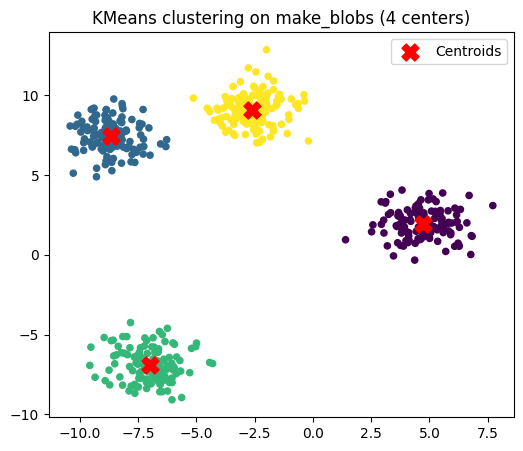

In [2]:
# Answer 21

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=150, marker='X', label='Centroids')
plt.title('KMeans clustering on make_blobs (4 centers)')
plt.legend()
plt.show()

In [4]:
# Answer 22

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


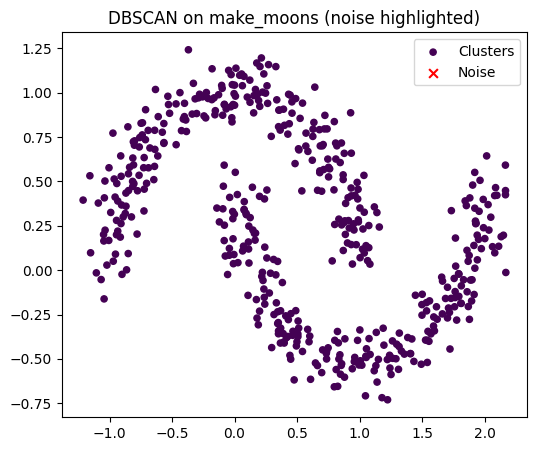

In [6]:
# Answer 23

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y_true = make_moons(n_samples=500, noise=0.1, random_state=42)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

core_mask = labels != -1
noise_mask = labels == -1

plt.figure(figsize=(6, 5))
plt.scatter(X[core_mask, 0], X[core_mask, 1], c=labels[core_mask], cmap='viridis', s=20, label='Clusters')
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', s=40, marker='x', label='Noise')
plt.title('DBSCAN on make_moons (noise highlighted)')
plt.legend()
plt.show()


In [8]:
# Answer 24

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes (label: count):")
for lbl, cnt in zip(unique, counts):
    print(lbl, ":", cnt)


Cluster sizes (label: count):
0 : 65
1 : 51
2 : 62


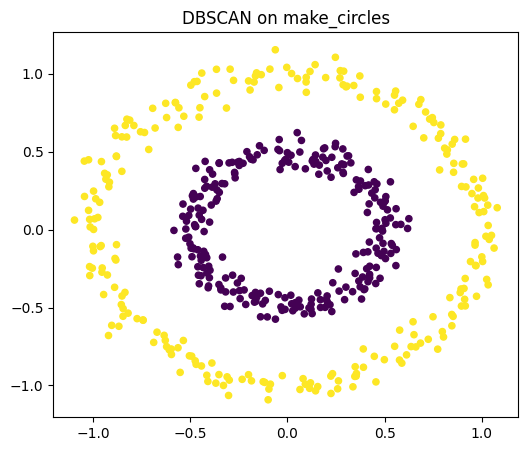

In [11]:
# Answer 25

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title('DBSCAN on make_circles')
plt.show()


In [14]:
# Answer 26

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

bc = load_breast_cancer()
X = bc.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

print("Cluster centroids (in scaled feature space):")
print(kmeans.cluster_centers_)


Cluster centroids (in scaled feature space):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


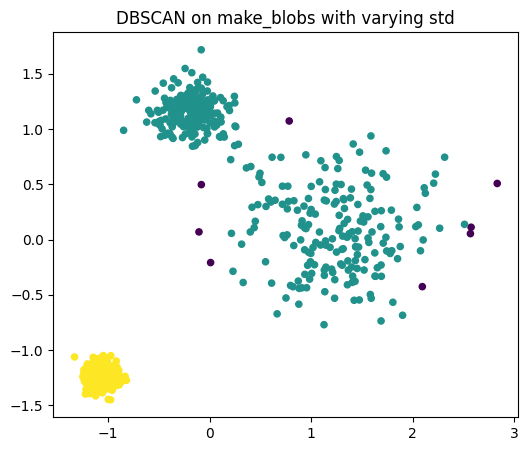

In [16]:
# Answer 27

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=600, centers=3,
                       cluster_std=[1.0, 2.5, 0.5],
                       random_state=42)

X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.title('DBSCAN on make_blobs with varying std')
plt.show()


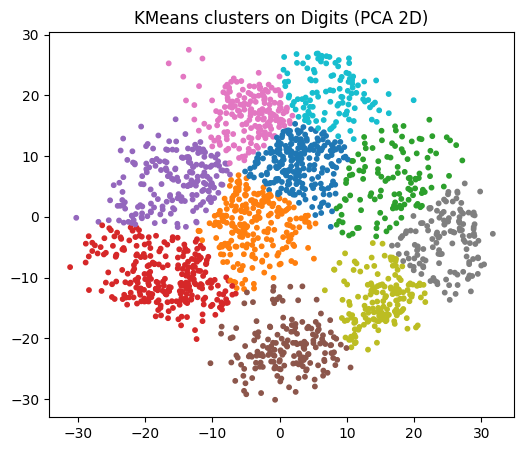

In [18]:
# Answer 28

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.title('KMeans clusters on Digits (PCA 2D)')
plt.show()


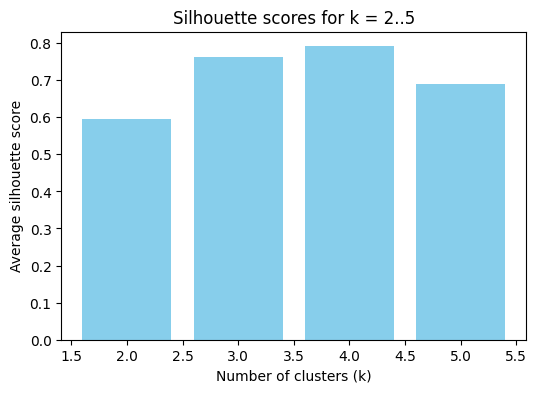

In [20]:
# Answer 29

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

scores = []
ks = [2, 3, 4, 5]

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

plt.figure(figsize=(6, 4))
plt.bar(ks, scores, color='skyblue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Silhouette scores for k = 2..5')
plt.show()


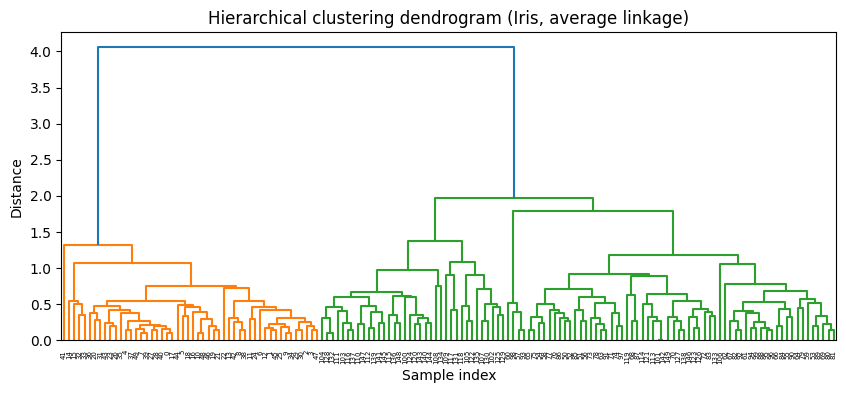

In [23]:
# Answer 30

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

Z = linkage(X, method='average')

plt.figure(figsize=(10, 4))
dendrogram(Z)
plt.title('Hierarchical clustering dendrogram (Iris, average linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


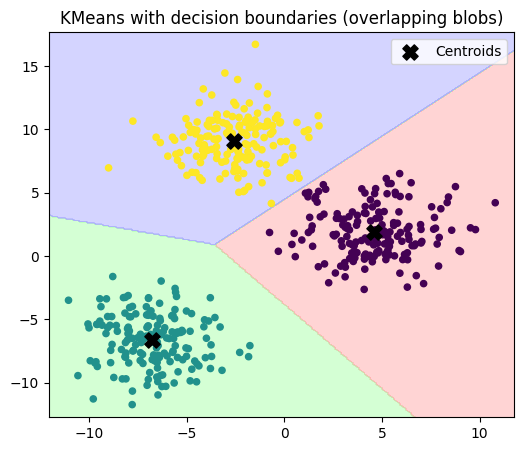

In [27]:
# Answer 31

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=2.0,
                       random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=120, marker='X', label='Centroids')
plt.title('KMeans with decision boundaries (overlapping blobs)')
plt.legend()
plt.show()


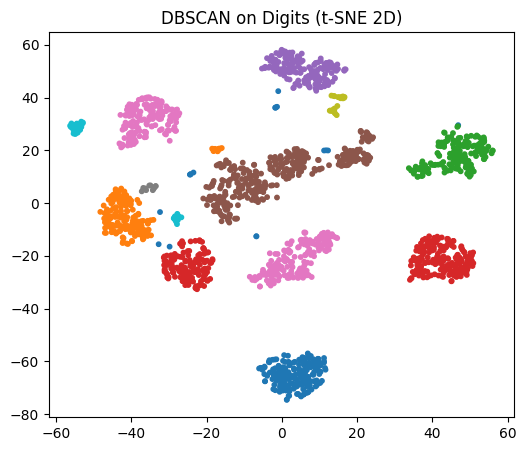

In [29]:
# Answer 32

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

db = DBSCAN(eps=3.0, min_samples=5)
labels = db.fit_predict(X_tsne)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title('DBSCAN on Digits (t-SNE 2D)')
plt.show()


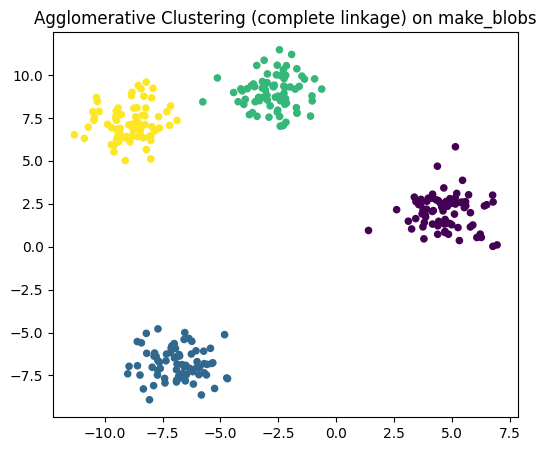

In [35]:
# Answer 33

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title('Agglomerative Clustering (complete linkage) on make_blobs')
plt.show()


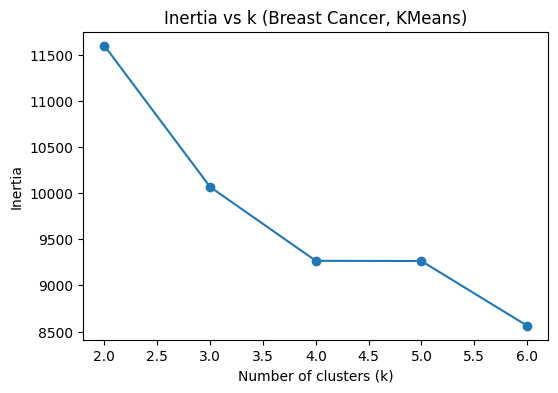

In [39]:
# Answer 34

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ks = range(2, 7)
inertias = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs k (Breast Cancer, KMeans)')
plt.show()


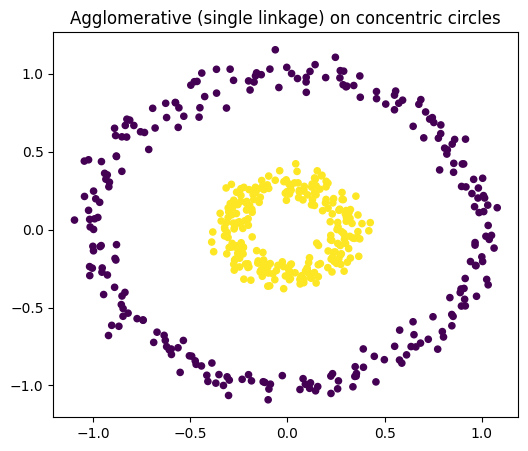

In [41]:
# Answer 35

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y_true = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title('Agglomerative (single linkage) on concentric circles')
plt.show()




In [44]:
# Answer 36

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=1.2, min_samples=5)
labels = db.fit_predict(X_scaled)

unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)
n_clusters = len(unique_labels)

print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


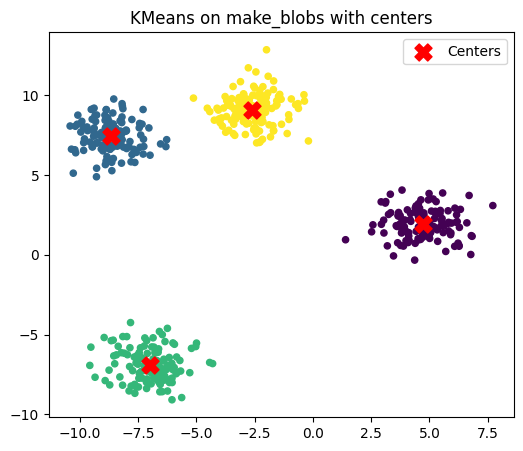

In [46]:
# Answer 37

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='X', label='Centers')
plt.title('KMeans on make_blobs with centers')
plt.legend()
plt.show()


In [50]:
# Answer 38

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = iris.data

X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X_scaled)

noise_count = np.sum(labels == -1)
print("Number of noise samples (Iris + DBSCAN):", noise_count)


Number of noise samples (Iris + DBSCAN): 4


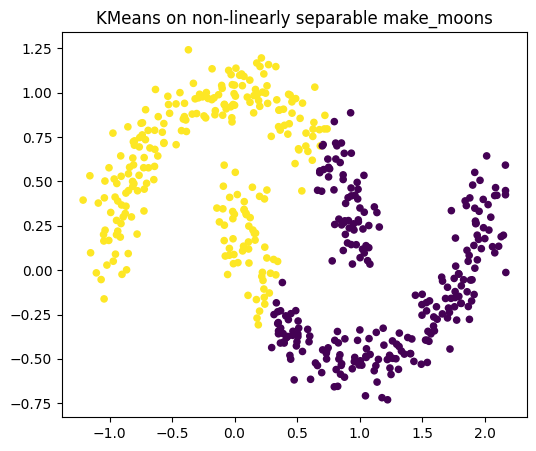

In [52]:
# Answer 39

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_moons(n_samples=500, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title('KMeans on non-linearly separable make_moons')
plt.show()


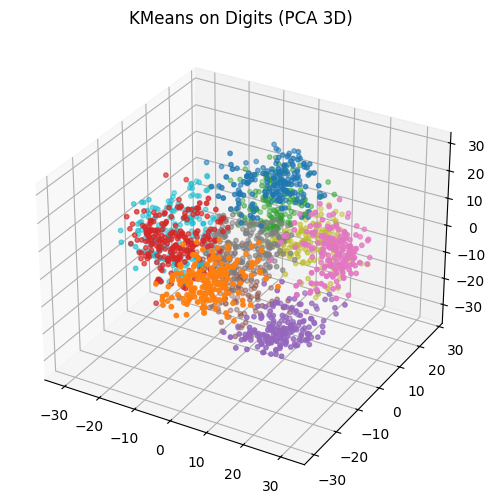

In [54]:
# Answer 40

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

digits = load_digits()
X = digits.data

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
           c=labels, cmap='tab10', s=10)
ax.set_title('KMeans on Digits (PCA 3D)')
plt.show()


In [57]:
# Answer 41

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette score for KMeans (5 centers):", score)


Silhouette score for KMeans (5 centers): 0.6667603739055007


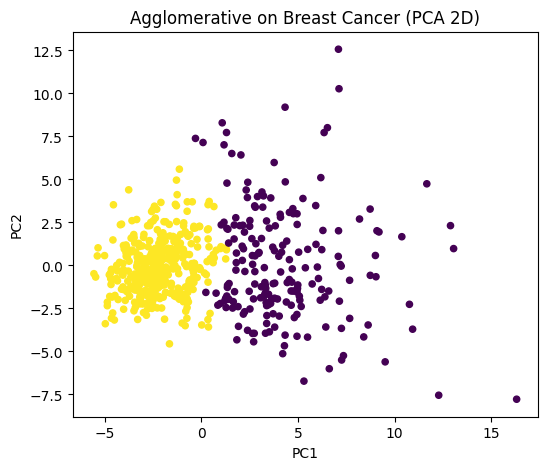

In [59]:
# Answer 42

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=20)
plt.title('Agglomerative on Breast Cancer (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


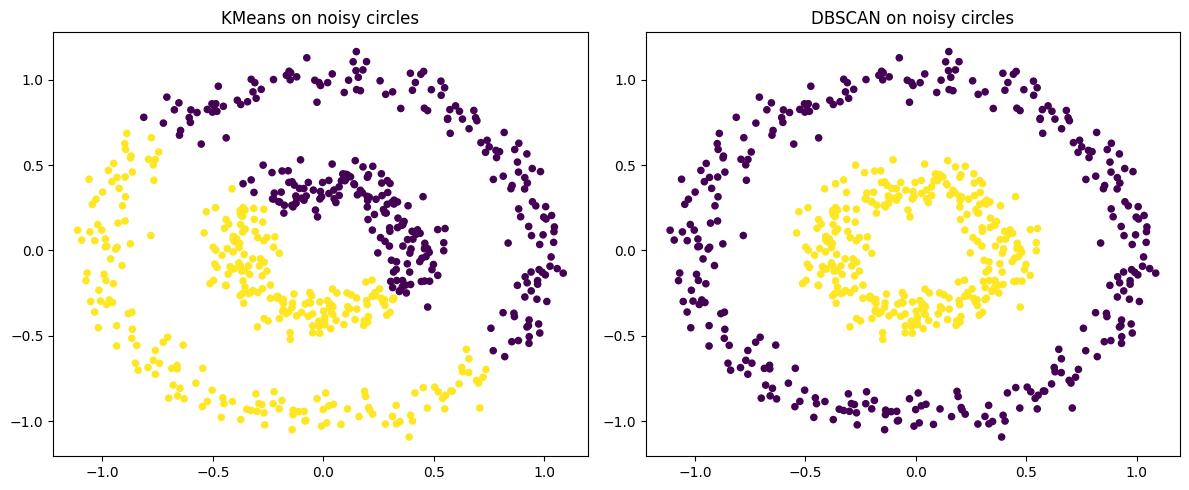

In [62]:
# Answer 43

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, y_true = make_circles(n_samples=600, factor=0.4, noise=0.07, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

kmeans = KMeans(n_clusters=2, random_state=42)
labels_km = kmeans.fit_predict(X)
axes[0].scatter(X[:, 0], X[:, 1], c=labels_km, cmap='viridis', s=20)
axes[0].set_title('KMeans on noisy circles')

db = DBSCAN(eps=0.2, min_samples=5)
labels_db = db.fit_predict(X)
axes[1].scatter(X[:, 0], X[:, 1], c=labels_db, cmap='viridis', s=20)
axes[1].set_title('DBSCAN on noisy circles')

plt.tight_layout()
plt.show()


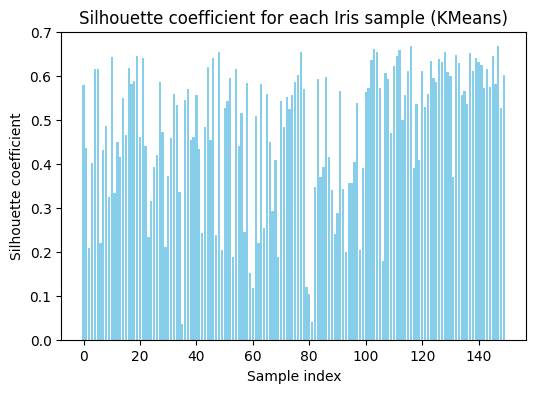

In [65]:
# Answer 44

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

sample_sil = silhouette_samples(X_scaled, labels)

plt.figure(figsize=(6, 4))
plt.bar(range(len(sample_sil)), sample_sil, color='skyblue')
plt.xlabel('Sample index')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette coefficient for each Iris sample (KMeans)')
plt.show()


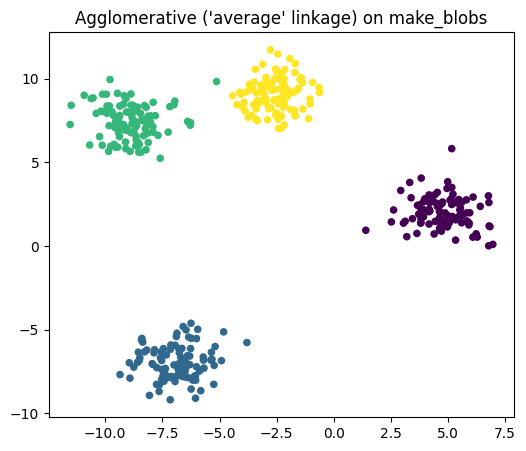

In [69]:
# Answer 45

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title("Agglomerative ('average' linkage) on make_blobs")
plt.show()


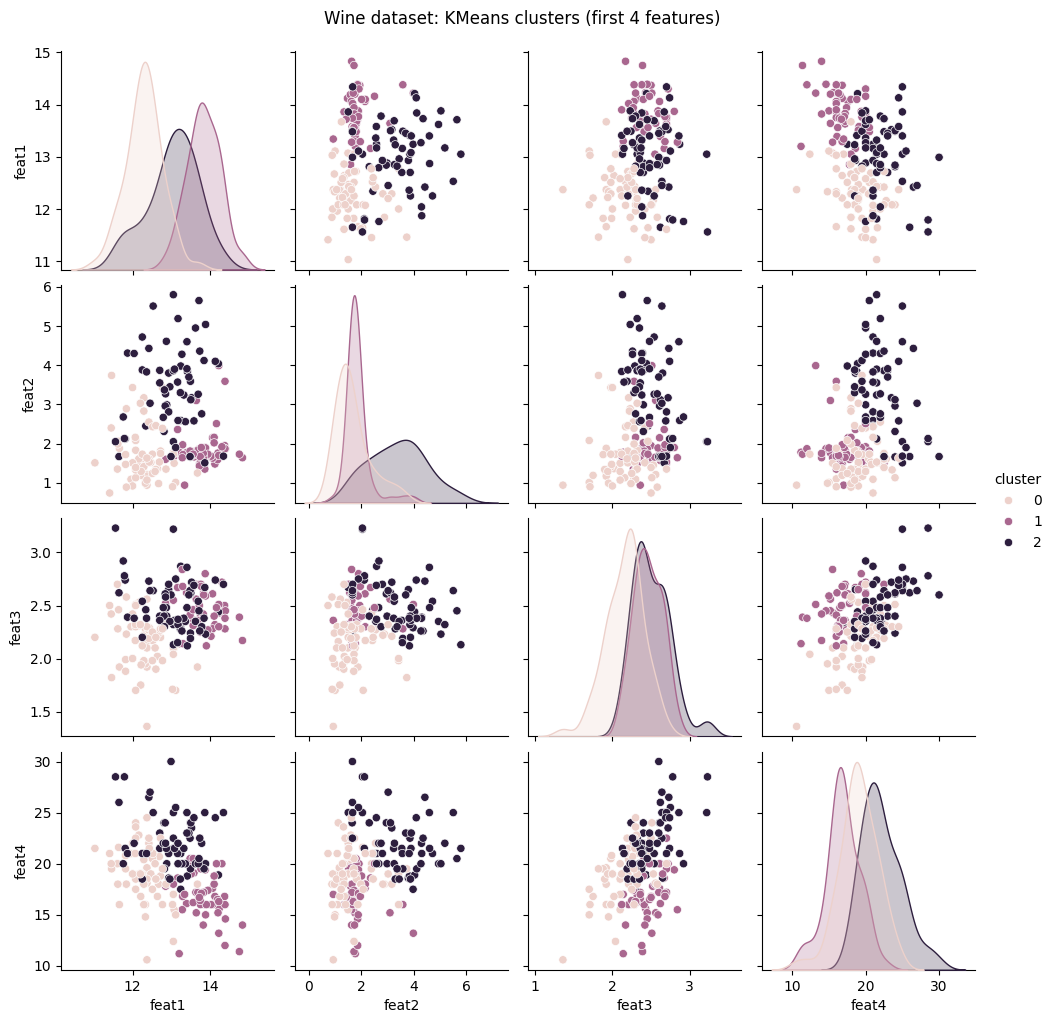

In [73]:
# Answer 46

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()
X = wine.data[:, :4]

X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df = pd.DataFrame(X, columns=['feat1', 'feat2', 'feat3', 'feat4'])
df['cluster'] = labels

sns.pairplot(df, hue='cluster', vars=['feat1', 'feat2', 'feat3', 'feat4'])
plt.suptitle('Wine dataset: KMeans clusters (first 4 features)', y=1.02)
plt.show()


Label : count
-1 : 3
0 : 398
1 : 199
Noise points: 3


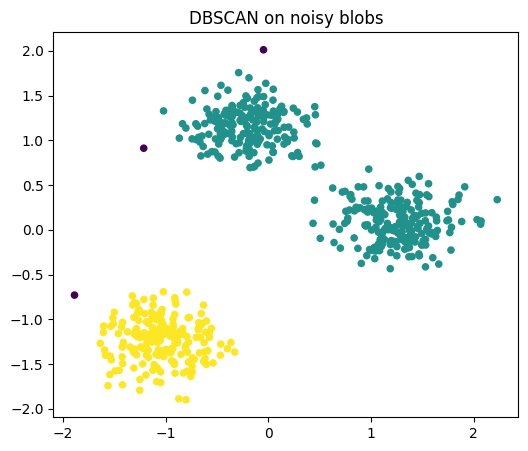

In [77]:
# Answer 47

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=1.5, random_state=42)

X_scaled = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

unique_labels, counts = np.unique(labels, return_counts=True)
print("Label : count")
for lbl, cnt in zip(unique_labels, counts):
    print(lbl, ":", cnt)

noise_count = np.sum(labels == -1)
print("Noise points:", noise_count)

plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=20)
plt.title('DBSCAN on noisy blobs')
plt.show()


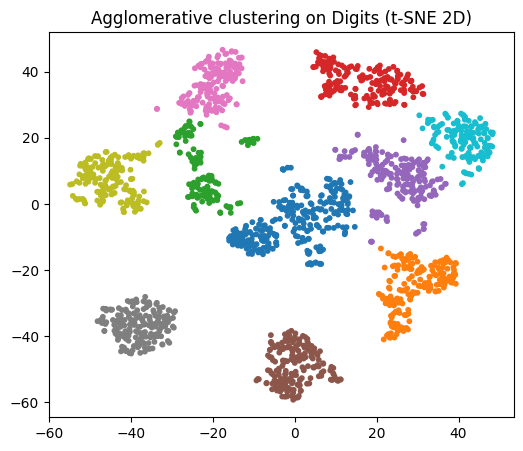

In [79]:
# Answer 48

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=10)
labels = agg.fit_predict(X_tsne)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.title('Agglomerative clustering on Digits (t-SNE 2D)')
plt.show()
